# Time Series Demo

This demo shows how estimate of the spectral power distribution (SPD) may depends on the sampling.

Consider there is some periodic emission from some source $s(t)$.
Because of the finite emission region or finite speed of light, the periodic signal is washed out by a kernel $k(t)$.
The resulting signal is simply a convolution of the two functions $f(t) = (s*k)(t)$.
Using the convolution theorem, $F_\omega = S_\omega K_\omega$, the SPD is $P_\omega = |F_\omega|^2 = |S_\omega|^2 |K_\omega|^2$.

We are interested in finding out how different ways of calculating the signal, especially depending on the "bin sizes", would affect the numerical estimate of the SPD.

By using the "comb" function, there is formal mathematical way to derive these dependence.
However, for the purpose of this demo, we will just try things out numerically to gain some insights.

Let's important standard libraries.

In [1]:
import numpy as np
from numpy import pi
from numpy.fft import fft
from matplotlib import pyplot as plt

And define the functions...
The signal has 99.99% of energy in the mean, and only 0.01% of energy in the sine wave.
The kernel is just a Gaussian with small (narraw) sigma.

In [2]:
def s(t, m=0.9999):
    return np.sqrt(m) + np.sqrt(2.0*(1.0 - m)) * np.sin(2*pi*t)

def k(t, s=0.1):
    return np.exp(-t*t/(s*s*2))

This is how $s(t)$ and $k(t)$ look like:

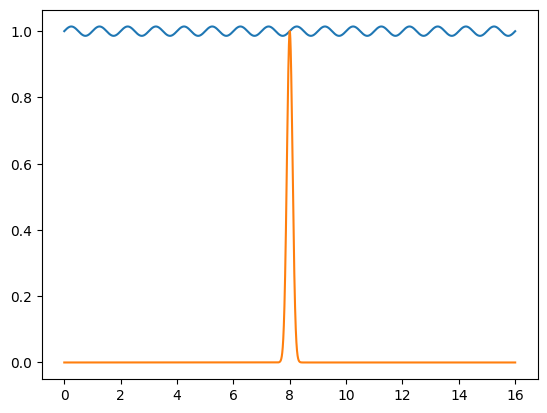

In [3]:
L = 16
N = 16*1024
T = np.linspace(0, L, num=N, endpoint=False)

plt.plot(T, s(T))
plt.plot(T, k(T-T[len(T)//2]))

We can also plot SPDs directly using the convolution theorem.

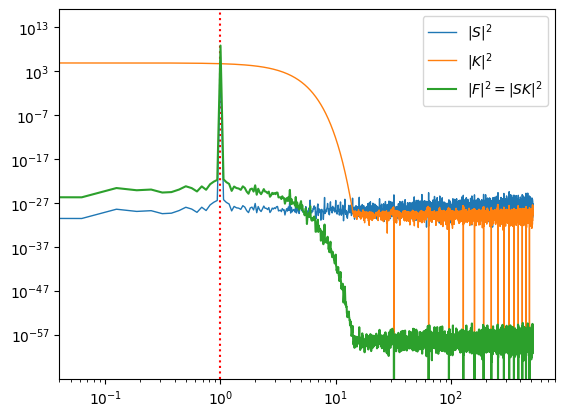

In [4]:
L = 16
N = 16*1024
T = np.linspace(0, L, num=N, endpoint=False)

Omega = np.fft.fftfreq(N, d=T[1]-T[0])[:N//2]

S = fft(s(T))[:N//2]
K = fft(k(T - np.max(T)/2))[:N//2]

plt.axvline(1, color='r', ls=':')
plt.loglog(Omega, abs(S)**2, lw=1, label='$|S|^2$')
plt.loglog(Omega, abs(K)**2, lw=1, label='$|K|^2$')
plt.loglog(Omega, (abs(S) * abs(K))**2, label='$|F|^2 = |SK|^2$')
plt.legend()

Now, let's test out how the bin size affect the estimated PSD.
We define `bin(X, N)` to bin an array every `N` data points.

(0.0, 1.0)

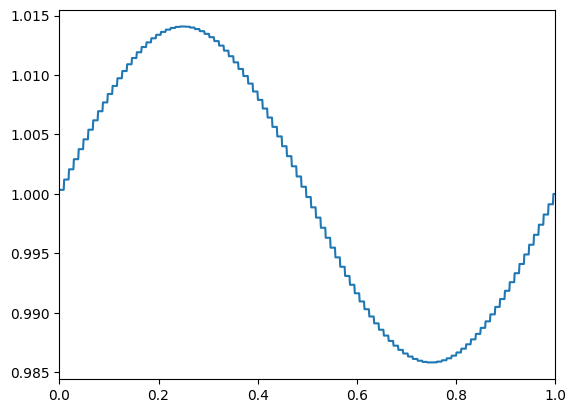

In [5]:
def bin(X, N):
    for b in range(0, len(X), N):
        e = min(b+N, len(X))
        X[b:e] = np.mean(X[b:e])
    return X

plt.plot(T, bin(s(T), 10))
plt.xlim(0, 1)

We then define `binbin(N1, N1)` to bin the kernel during convolution.

In [6]:
def binbin(N1, N2):
    F = 0
    for i in range(0, N, N2):
        F += bin(k(T - T[i]), N1) * s(T[i])
    return F

We can now easily plan around with `N1` and `N2` and see how they affect the estimated PSD.

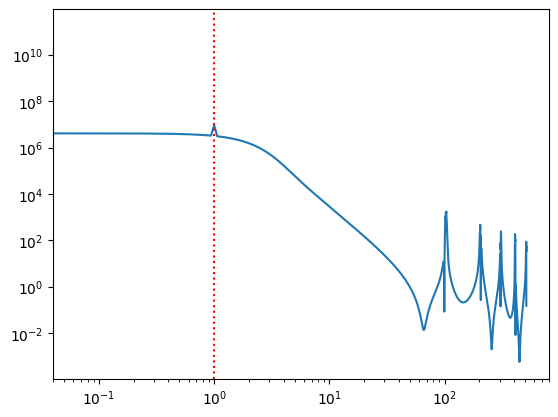

In [7]:
F = binbin(10, 10)
plt.loglog(Omega[:N//2], (abs(fft(F))**2)[:N//2])
plt.axvline(1, color='r', ls=':')

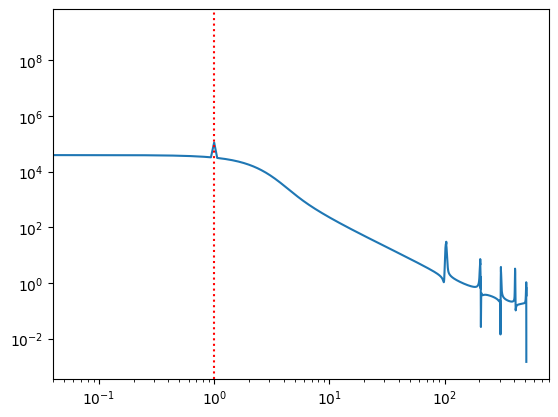

In [8]:
F = binbin(10, 100)
plt.loglog(Omega[:N//2], (abs(fft(F))**2)[:N//2])
plt.axvline(1, color='r', ls=':')

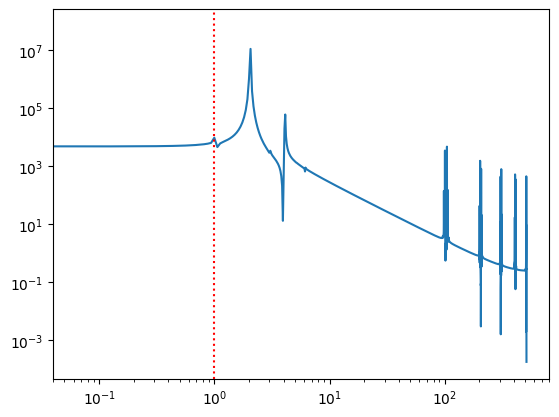

In [9]:
F = binbin(10, 500)
plt.loglog(Omega[:N//2], (abs(fft(F))**2)[:N//2])
plt.axvline(1, color='r', ls=':')

A large `N2` may lead to artificial peaks.  Why?
We may directly see it in the lightcurves.

(0.0, 1.0)

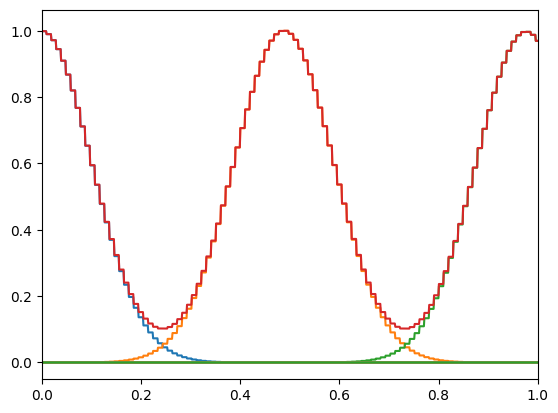

In [10]:
N1, N2 = 10, 500

S = 0
for i in range(0, N, N2):
    F = bin(k(T - T[i]), N1) * s(T[i])
    plt.plot(T, F)
    S += F

plt.plot(T, S)
plt.xlim(0, 1)